In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, VotingClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [6]:
df = pd.read_csv("heart.csv")

In [10]:
X = df[['restecg', 'oldpeak']]  # independent variables
y = df['target']                # dependent variable

In [11]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
dt = DecisionTreeClassifier(criterion='entropy', random_state=42)
rf = RandomForestClassifier(random_state=42)
knn = KNeighborsClassifier()
xgb = XGBClassifier(eval_metric='logloss', random_state=42)

In [22]:
estimators = [('dt', dt), ('rf', rf), ('knn', knn), ('xgb', xgb)]
hard_voting = VotingClassifier(estimators=estimators, voting='hard')
hard_voting.fit(x_train, y_train)
y_pred = hard_voting.predict(x_test)
hard_acc = accuracy_score(y_test, y_pred)
print(f'Hard Voting Classifier Accuracy: {hard_acc:.2f}')

Hard Voting Classifier Accuracy: 0.68


In [23]:
soft_voting = VotingClassifier(estimators=estimators, voting='soft')
soft_voting.fit(x_train, y_train)
y_pred_soft = soft_voting.predict(x_test)
accuracy_soft = accuracy_score(y_test, y_pred_soft)
print(f'Soft Voting Classifier Accuracy: {accuracy_soft:.2f}')

Soft Voting Classifier Accuracy: 0.69


In [26]:
best_acc = 0
best_weights = None

for w1 in range(1, 5):
    for w2 in range(1, 5):
        for w3 in range(1, 5):
            for w4 in range(1, 5):
                soft_voting = VotingClassifier(
                    estimators=[('dt', dt), ('knn', knn), ('rf', rf), ('xgb', xgb)],
                    voting='soft',
                    weights=[w1, w2, w3, w4]
                )
                soft_voting.fit(x_train, y_train)
                acc = soft_voting.score(x_test, y_test)
                if acc > best_acc:
                    best_acc = acc
                    best_weights = (w1, w2, w3, w4)

print("Best Soft Voting Accuracy:", best_acc)
print("Best Weights:", best_weights)


Best Soft Voting Accuracy: 0.6878048780487804
Best Weights: (1, 1, 1, 1)


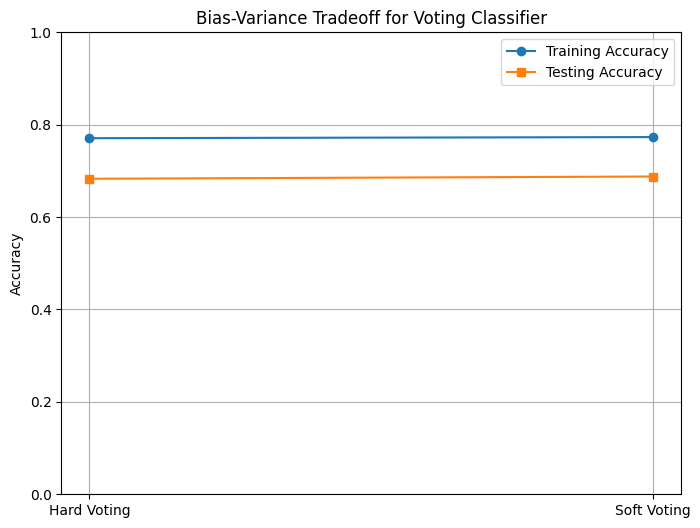

In [25]:
import matplotlib.pyplot as plt

methods = ['Hard Voting', 'Soft Voting']
train_acc = [hard_voting.score(x_train, y_train), soft_voting.score(x_train, y_train)]
test_acc  = [hard_acc, best_acc]

plt.figure(figsize=(8,6))
plt.plot(methods, train_acc, marker='o', label='Training Accuracy')
plt.plot(methods, test_acc, marker='s', label='Testing Accuracy')
plt.title("Bias-Variance Tradeoff for Voting Classifier")
plt.ylabel("Accuracy")
plt.ylim(0,1)
plt.grid(True)
plt.legend()
plt.show()
